In [1]:
# Import the necessary modules
from classes.utils import *
from classes.SGD import SGD
from classes.LogisticRegression import LogisticRegression

Training Epochs: 100%|██████████| 700/700 [00:01<00:00, 483.07it/s]


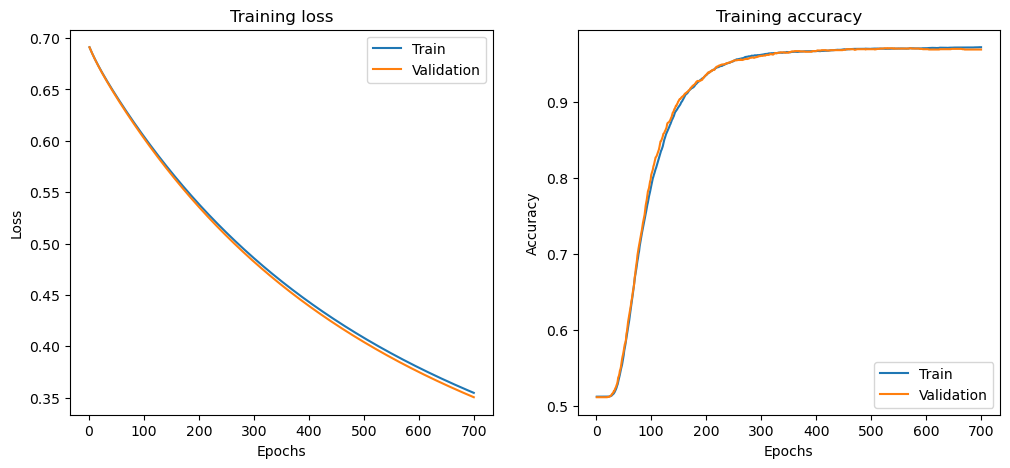

The Logistic Regression accuracy on test data is:  0.97691


In [5]:
# Main function to run the experiments
def main():
    data = load_data()
    X_train, y_train = data["train"]
    X_val, y_val = data["val"]
    X_test, y_test = data["test"]
    train_data = X_train, X_val, y_train, y_val

    batch_size = X_train.shape[0]
    input_size = X_train.shape[1]
    num_epochs = 700
    learning_rate = 0.1

    # Logistic Regression Model
    model = LogisticRegression(input_size)

    # Optimizer
    optimizer = SGD(model.get_params_and_grads()[0], learning_rate)

    train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_data, optimizer, num_epochs, batch_size)

    all_losses = [train_losses, val_losses]
    all_accuracies = [train_accuracies, val_accuracies]
    all_labels = ["Train", "Validation"]
    plot_all_results(all_losses, all_accuracies, all_labels)

    # Evaluating test data accuracy
    output = model(X_test)
    y_predict = (output >= 0.5).astype(int)
    acc_lr = compute_accuracy(y_test, y_predict)

    print(f"The Logistic Regression accuracy on test data is: {acc_lr: 0.5f}")

    
if __name__ == "__main__":
    main()